O conjunto escolhido para a primeira parte da prática foi o Titanic, que pode ser visualizado rodando o código abaixo:

In [1]:
import numpy as np
import pandas as pd
import csv
import seaborn as sns
from matplotlib import pyplot as plt

titanic = pd.read_csv("./datasets/titanic/train.csv")
df = pd.DataFrame(data=titanic)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Hipóteses propostas:
1. A porcentagem de crianças que sobreviveram é maior que a porcentagem de adultos que sobreviveram (colunas Survived[1] e Age[5]);
2. A porcentagem de pessoas acompanhadas que sobreviveram é maior que a de pessoas desacompanhadas que sobreviveram (colunas Survived[1] e SibSp[6]).
3. Os sobreviventes tem uma taixa maior de Fare (colunas Survived[1] e Fare[9]);

**- Histograma**

Código abaixo contem as funções feitas para o plot do histograma:

In [2]:
def tira_nan(x):
    return x[~np.isnan(x)]

def hist(x, y, labels, labelx, bins):
    plt.xlabel(labelx, fontsize=14)  
    plt.ylabel("Occurrences", fontsize=14)
    plt.hist(x, bins=bins, fc=(0, 0, 1, 0.5))
    plt.hist(y, bins=bins, fc=(0, 1, 0, 0.5))
    plt.tight_layout()
    plt.legend(labels)
    plt.show()

v_sobrevivente = np.ndarray.astype((titanic["Survived"] == 1).values, dtype=np.bool)
sobrevivente1 = titanic[v_sobrevivente]
sobrevivente0 = titanic[np.logical_not(v_sobrevivente)]

Histograma Age:

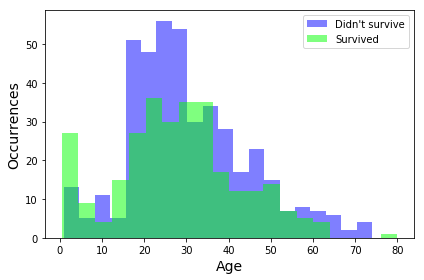

In [3]:
hist(tira_nan(sobrevivente0.Age.values), tira_nan(sobrevivente1.Age.values), ["Didn't survive", "Survived"], "Age", 20)

Histograma SibSp:

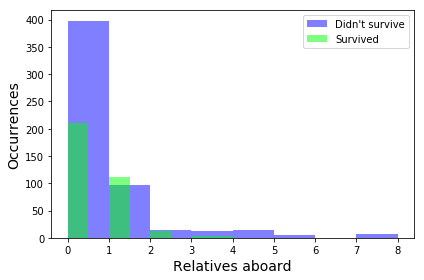

In [4]:
hist(tira_nan(sobrevivente0.SibSp.values), tira_nan(sobrevivente1.SibSp.values), ["Didn't survive", "Survived"],  "Relatives aboard", 8)

Histograma Fare:

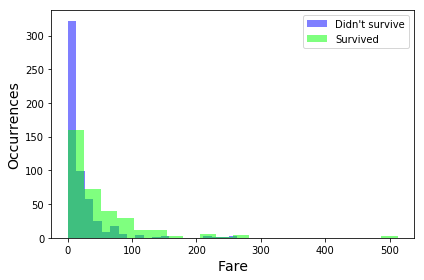

In [5]:
hist(tira_nan(sobrevivente0.Fare.values), tira_nan(sobrevivente1.Fare.values), ["Didn't survive", "Survived"], "Fare", 20)

O histograma apresenta informação mais rica sobre a distribuição dos dados do que o boxplot, a partir do histograma pode-se ter uma ideia das informaçoes dadas pelo boxplot, com menos chances de ser induzido ao erro na análise.

**- Análise multivariada.**

Covariância:

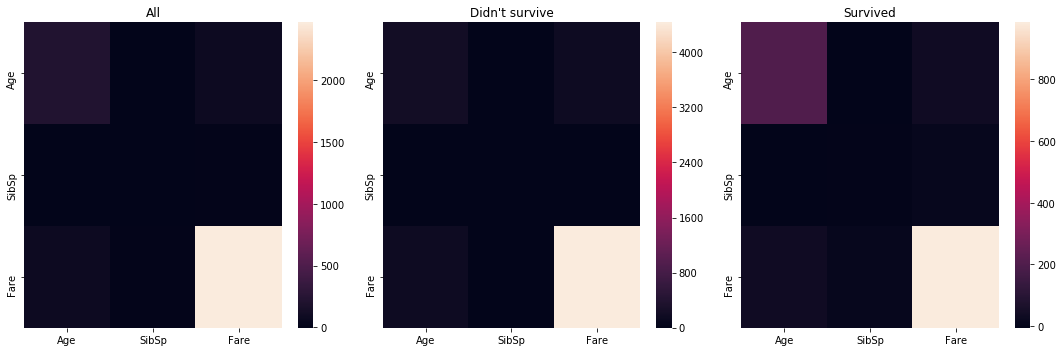

In [6]:
titanic0 = titanic[v_sobrevivente]
titanic1 = titanic[~v_sobrevivente]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("All")
cov = titanic.iloc[:, [5,6,9]].cov()
sns.heatmap(cov)

plt.subplot(1, 3, 2)
plt.title("Didn't survive")
cov = titanic0.iloc[:, [5,6,9]].cov()
sns.heatmap(cov)

plt.subplot(1, 3, 3)
plt.title("Survived")
cov = titanic1.iloc[:, [5,6,9]].cov()
sns.heatmap(cov)

plt.tight_layout()
plt.show()

Correlação

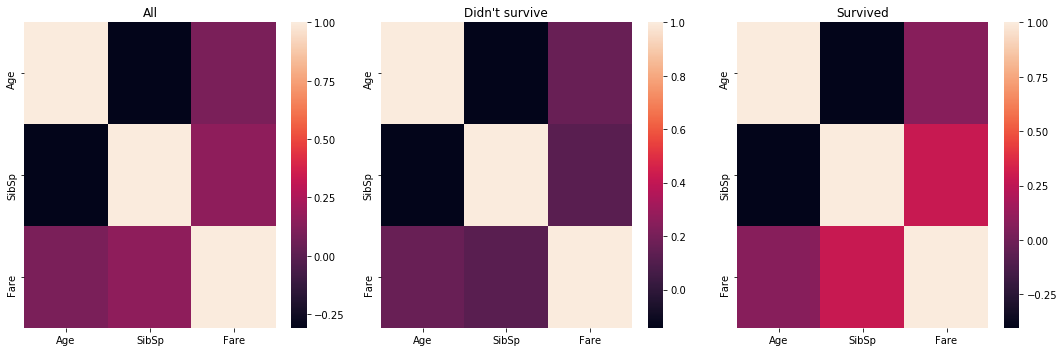

In [7]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("All")
cor = titanic.iloc[:, [5,6,9]].corr()
sns.heatmap(cor)

plt.subplot(1, 3, 2)
plt.title("Didn't survive")
cor = titanic0.iloc[:, [5,6,9]].corr()
sns.heatmap(cor)

plt.subplot(1, 3, 3)
plt.title("Survived")
cor = titanic1.iloc[:, [5,6,9]].corr()
sns.heatmap(cor)

plt.tight_layout()
plt.show()

Neste caso a correlação é mais informativa pois é corrigida pelo desvio padrão. Os dois gráficos são informativos podendo dar mais insights sobre o problema, porém neste caso em específico eles não respondem as perguntas feitas.

**- Gráfico de dispersão (*scatter plot*)**

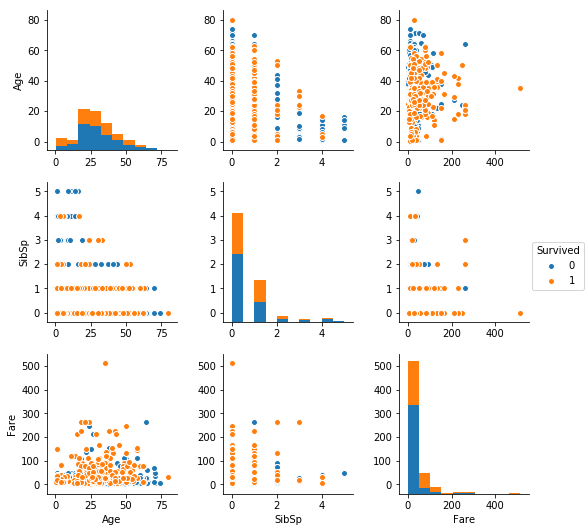

In [8]:
# tirando NaN
def clear(x, col):
    return x[~np.isnan(x[col])]

columns = ["Age", "SibSp", "Fare"]
titanic = clear(titanic, "Age")
titanic = clear(titanic, "SibSp")
titanic = clear(titanic, "Fare")
sns.pairplot(data=titanic, vars=columns, hue='Survived')
plt.show()

**5- Explique como os gráficos permitem uma inspeção mais fácil e intuitiva de tendências, padrões e outliers? Se achar mais fácil use exemplos já explorados mas refaça os gráficos aqui para ilustrar seu ponto.**

Os vários tipos de gráficos apresentam de maneira clara e direta a relação entre as variáveis (scatter plot, covariância e correlação) e a distribuição deles (boxplot e histograma) o que permite análise rapida e simples sobre os dados detectando tendências e até mesmo outliers em grandes conjuntos.

**6- Após a análise exploratória reanalise as hipóteses/questões e comente se elas já podem ser respondidas, se elas não fazem mais sentido, eventualmente se elas podem ser reformuladas.**

Já que as hipóteses não indicam relação entre variáveis a análise do histograma as responde.
1. Pela analise do histograma pode-se dizer que a hipotése é levemente correta, com uma sobreposição na contagem de sobreviventes entre 0 a 15 anos.
2. O histograma mostra maior porcentagem de desacompanhados que não sobreviveram e equilibrio entre os acompanhados, pode-se dizer que a porcentagem de acompanhados que sobreviveram é maior neste caso.
3. Este é o caso mais claro, a hipótese se confirma fortemente.

O segundo conjunto de dados escolhido foi o Instituições de Ensino Básico, que pode ser visualizado a seguir:

In [9]:
inst_ens = pd.read_csv("./datasets/instituicoes_ensino_basico/CADASTRO_MATRICULAS_REGIAO_SUDESTE_SP_2012.csv", 
                       encoding="ISO-8859-1", sep=";", engine="python", header=11, skipfooter=2)
df = pd.DataFrame(data=inst_ens)
df

,ANO_CENSO,PK_COD_ENTIDADE,Nome_Escola,REDE,ID_DEPENDENCIA_ADM,Dependencia_Administrativa,CATESCPRIVADA,Localizacao,REGIAO,FK_COD_ESTADO,...,MATEEINCL,NESCEE,MATESPTOT,NESCEDESP,MATESP,NESCEDESPEXCLUS,MATESPEXCLUS,NESCEDESPCLESP,MATESPCLESP,ESCACESS
0,2012,35000012,AYRES DE MOURA PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,6,1,6,0,0,0,0,0,0,0
1,2012,35000024,GAVIAO PEIXOTO BRIGADEIRO,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,21,1,21,0,0,0,0,0,0,0
2,2012,35000036,JOAO SOLIMEO,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,27,1,27,0,0,0,0,0,0,0
3,2012,35000048,WALFREDO ARANTES CALDAS PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,8,1,8,0,0,0,0,0,0,0
4,2012,35000059,SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,5,1,5,0,0,0,0,0,0,0
5,2012,35000061,SUZANA DE CAMPOS DONA,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,9,1,9,0,0,0,0,0,0,1
6,2012,35000073,JULIO DE FARIA E SOUZA PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,1,1,1,0,0,0,0,0,0,0
7,2012,35000085,JULIO CESAR DE OLIVEIRA PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,30,1,30,0,0,0,0,0,0,1
8,2012,35000097,RENATO DE ARRUDA PENTEADO PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,4,1,4,0,0,0,0,0,0,1
9,2012,35000103,JOAO BOEMER JARDIM PROFESSOR,Pública,2,Estadual,NaN,Urbana,Sudeste,35,...,7,1,7,0,0,0,0,0,0,1


Hipóteses propostas:
1. Número de salas existentes é maior na rede privada do que na pública (coluna NUM_SALAS_EXISTENTES);
2. Número funcionários é maior na rede privada do que na pública (coluna NUM_FUNCIONARIOS);
3. Número computadores é maior na rede urbana do que na rural (coluna NUM_COMPUTADORES);

In [10]:
v_privada = np.ndarray.astype((inst_ens["REDE"] == 'Privada').values, dtype=np.bool)
privada = inst_ens[v_privada]
publica = inst_ens[np.logical_not(v_privada)]

v_rural = np.ndarray.astype((inst_ens["Localizacao"] == 'Rural').values, dtype=np.bool)
rural = inst_ens[v_rural]
urbana = inst_ens[np.logical_not(v_rural)]

Histograma NUM_SALAS_EXISTENTES (Privada, Public):

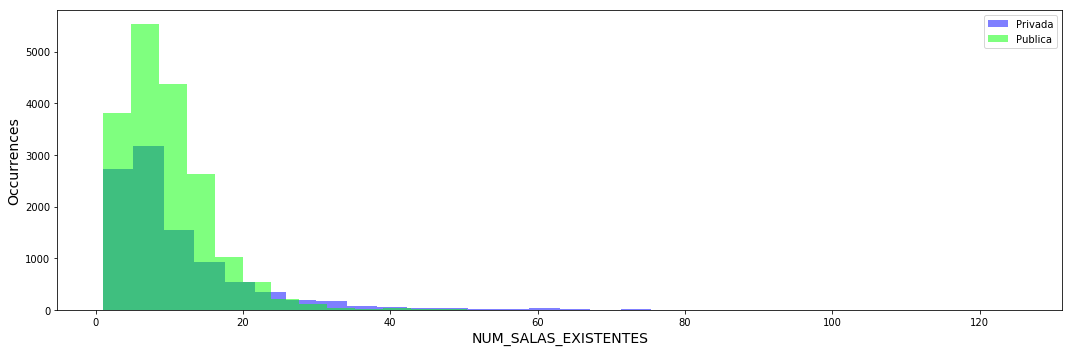

In [11]:
plt.figure(figsize=(15, 5))
hist(tira_nan(privada.NUM_SALAS_EXISTENTES.values), tira_nan(publica.NUM_SALAS_EXISTENTES.values), ["Privada", "Publica"], "NUM_SALAS_EXISTENTES", 30)

Histograma NUM_FUNCIONARIOS (Privada, Publica):

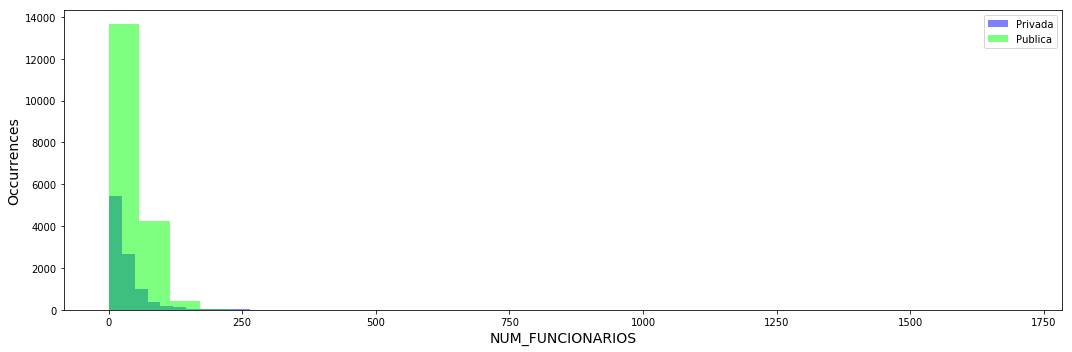

In [12]:
plt.figure(figsize=(15, 5))
hist(tira_nan(privada.NUM_FUNCIONARIOS.values), tira_nan(publica.NUM_FUNCIONARIOS.values), ["Privada", "Publica"], "NUM_FUNCIONARIOS", 30)

Histograma NUM_COMPUTADORES (Rural, Urbana):

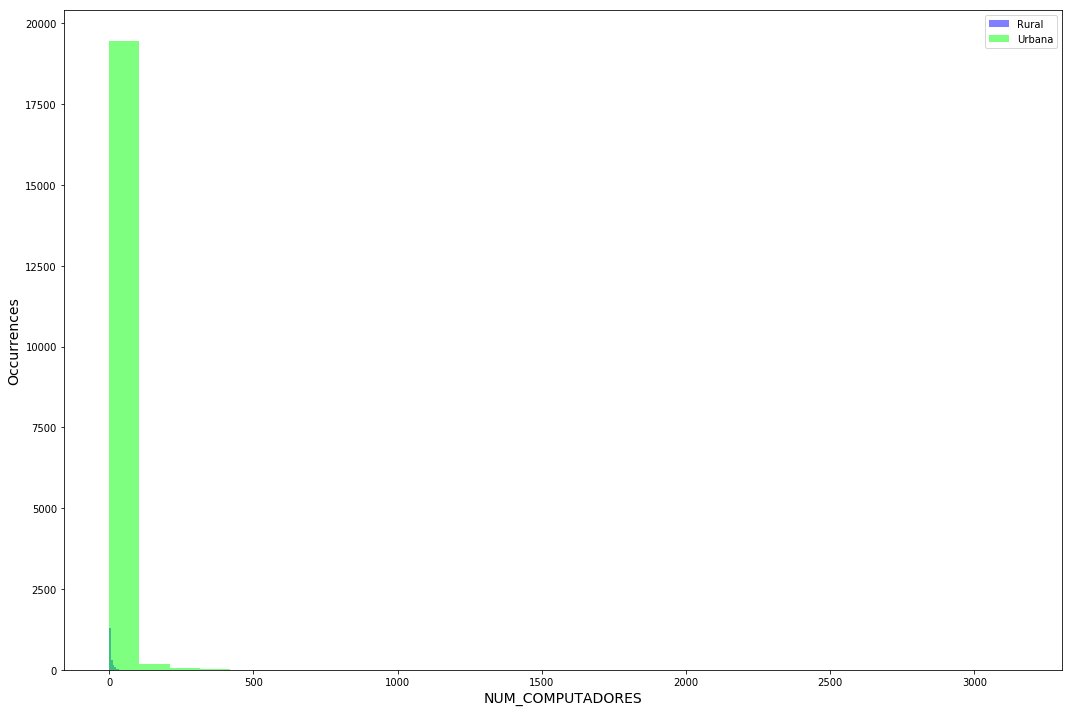

In [13]:
plt.figure(figsize=(15, 10))
hist(tira_nan(rural.NUM_COMPUTADORES.values), tira_nan(publica.NUM_COMPUTADORES.values), ["Rural", "Urbana"], "NUM_COMPUTADORES", 30)

Há presença clara de outliers observando-se os histogramas.

**- Análise multivariada.**

Covariância:

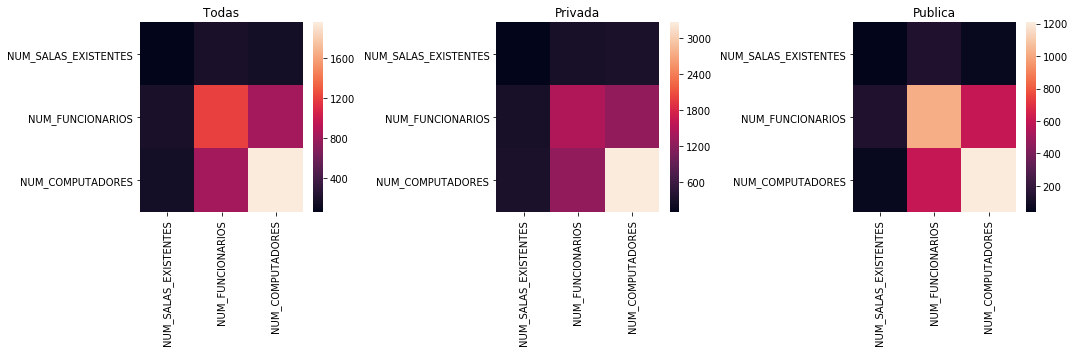

In [14]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Todas")
cov = inst_ens.iloc[:, [80, 86, 110]].cov()
sns.heatmap(cov)

plt.subplot(1, 3, 2)
plt.title("Privada")
cov = privada.iloc[:, [80, 86, 110]].cov()
sns.heatmap(cov)

plt.subplot(1, 3, 3)
plt.title("Publica")
cov = publica.iloc[:, [80, 86, 110]].cov()
sns.heatmap(cov)

plt.tight_layout()
plt.show()

Correlação:

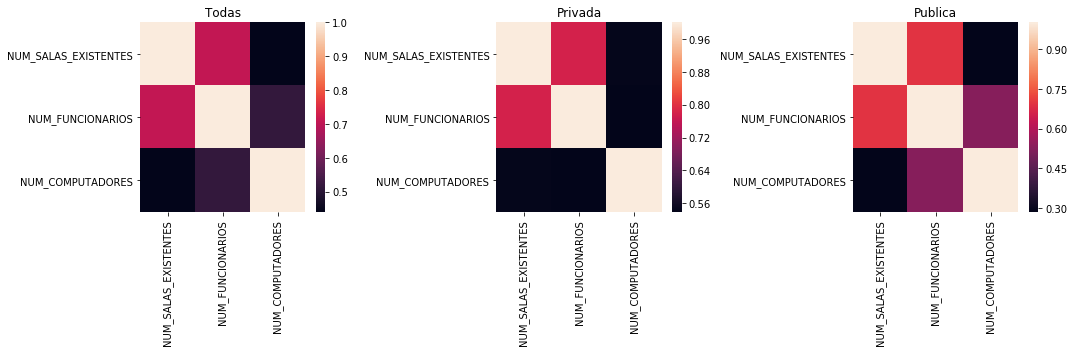

In [15]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Todas")
cor = inst_ens.iloc[:, [80, 86, 110]].corr()
sns.heatmap(cor)

plt.subplot(1, 3, 2)
plt.title("Privada")
cor = privada.iloc[:, [80, 86, 110]].corr()
sns.heatmap(cor)

plt.subplot(1, 3, 3)
plt.title("Publica")
cor = publica.iloc[:, [80, 86, 110]].corr()
sns.heatmap(cor)

plt.tight_layout()
plt.show()

Neste conjunto de dados percebe-se uma relação mais forte entre 2 colunas, NUM_FUNCIONARIOS E NUM_SALAS_EXISTENTES.

**- Gráfico de dispersão (*scatter plot*)**

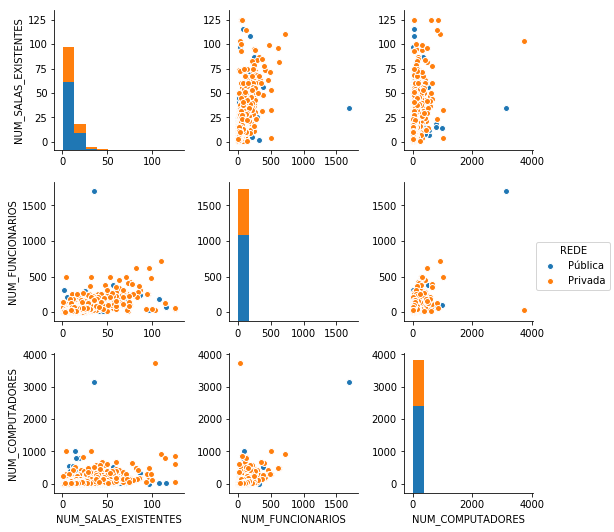

In [16]:
columns = ["NUM_SALAS_EXISTENTES", "NUM_FUNCIONARIOS", "NUM_COMPUTADORES"]
for col in columns:
    inst_ens = clear(inst_ens, col)
sns.pairplot(data=inst_ens, vars=columns, hue="REDE")
plt.show()

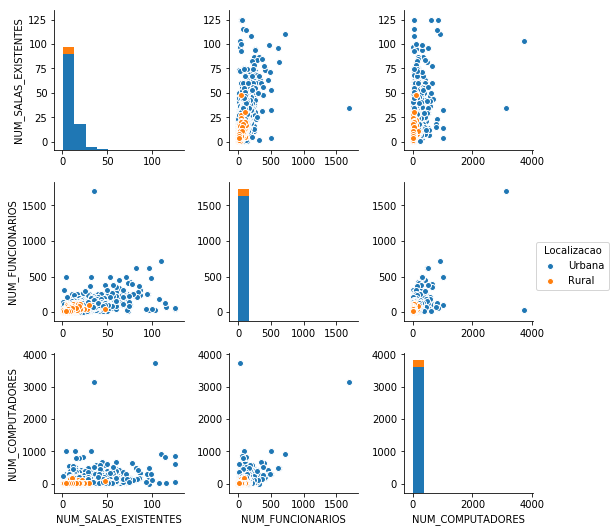

In [17]:
sns.pairplot(data=inst_ens, vars=columns, hue="Localizacao")
plt.show()

**6- Após a análise exploratória reanalise as hipóteses/questões e comente se elas já podem ser respondidas, se elas não fazem mais sentido, eventualmente se elas podem ser reformuladas.**

Já que as hipóteses não indicam relação entre variáveis a análise do histograma as responde.
1. Pela analise do histograma, a hipótese é refutada.
2. Pela analise do histograma, a hipótese é refutada.
3. A hipótese é fortemente confirmada.